# 1. The Bootstrap and The Normal Curve

In this exercise, we will explore a dataset that includes the safety inspection scores for restaurants in the city of Austin, Texas. We will be interested in determining the average restaurant score for the city from a random sample of the scores; the average restaurant score is out of 100. We'll compare two methods for computing a confidence interval for that quantity: the bootstrap resampling method, and an approximation based on the Central Limit Theorem.

In [1]:
import numpy as np
from datascience import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
pop_restaurants = Table.read_table("/Users/shristidhakal/Documents/Grad School/INFO5502/Restaurants Ratings/restaurant_inspection_scores.csv").drop('Facility ID','Process Description')
pop_restaurants

Restaurant Name,Zip Code,Inspection Date,Score,Address
6M Grocery,78652,01/17/2014,90,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,04/27/2015,93,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,05/02/2016,88,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,07/25/2014,100,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,10/21/2015,87,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,12/15/2014,93,"805 W FM 1626 RD AUSTIN, TX 78652"
7 Eleven #36575,78660,01/25/2016,92,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/05/2015,86,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/14/2014,93,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,07/27/2015,97,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"


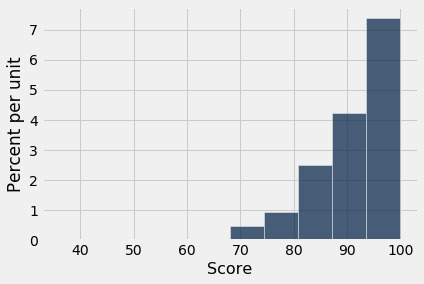

In [3]:
pop_restaurants.hist('Score')

In [4]:
pop_mean = np.mean(pop_restaurants.column('Score'))
pop_mean

91.40706693478886

In [5]:
restaurant_sample = pop_restaurants.sample(100, with_replacement=False)
restaurant_sample

Restaurant Name,Zip Code,Inspection Date,Score,Address
La Quinta Inn Austin North,78752,10/30/2015,100,"7622 N IH 35 SVRD SB AUSTIN, TX 78752 (30.338446, -97.70 ..."
Romano's Macaroni Grill,78759,10/22/2014,69,"9828 GREAT HILLS TRL Unit 3 AUSTIN, TX 78759 (30.394225, ..."
7-Eleven Convenience Store,78705,12/31/2014,76,"2600 GUADALUPE ST AUSTIN, TX 78705 (30.290567, -97.741326)"
Anderson Mill Elementary,78750,03/11/2016,100,"10610 SALT MILL HOLW AUSTIN, TX 78750 (30.453434, -97.80 ..."
Wal-Mart Supercenter-Bakery #1129,78729,04/08/2015,100,"13201 N FM 620 RD NB AUSTIN, TX 78729 (30.45313, -97.8277)"
Riverside Nursing & Rehab Center,78741,06/22/2015,97,"6801 E RIVERSIDE DR AUSTIN, TX 78741 (30.223087, -97.699223)"
MN - Creative World Learning Center - Austin Inc.,78653,04/08/2014,100,"11401 E US 290 HWY EB MANOR, TX 78653"
BC - Tony C's,78738,11/16/2015,98,"12800 HILL COUNTRY BLVD Unit 160 BEE CAVE, TX 78738 (30. ..."
Child Inc.-Grant Child Development Center,78758,08/19/2016,96,"1701 KRAMER LN AUSTIN, TX 78758 (30.385574, -97.703857)"
GMC Catering Inc.,78724,12/01/2015,100,"7311 DECKER LN AUSTIN, TX 78724 (30.296957, -97.624277)"


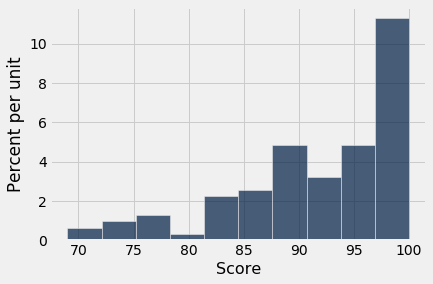

In [6]:
restaurant_sample.hist('Score')

In [7]:
sample_mean = np.mean(restaurant_sample.column('Score'))
sample_mean

91.62

# 1.1 Question 1

Complete the function one_resampled_mean below. It should take in an original table data, with a column Score, and return the mean score of one resampling from data.

In [8]:
def one_resampled_mean(data):
    resampled_data = data.sample(100, with_replacement=False)
    sample_mean = np.mean(resampled_data.column('Score'))
    return sample_mean

this_mean = one_resampled_mean(pop_restaurants)
this_mean

91.26

# 1.2 Question 2

Complete the function bootstrap_scores below. It should take no arguments. It should simulate drawing 5000 resamples from restaurant_sample and compute the mean restaurant score in each resample. It should return an array of those 5000 resample means.

In [9]:
def bootstrap_scores():
    resampled_means = make_array()
    for i in range(5000):
        resampled_data = restaurant_sample.sample(100, with_replacement=True)
        resampled_mean = one_resampled_mean(resampled_data)
        resampled_means = np.append(resampled_means, resampled_mean)
    return resampled_means

resampled_means = bootstrap_scores()
resampled_means

array([92.72, 91.42, 91.12, ..., 91.57, 91.62, 91.71])

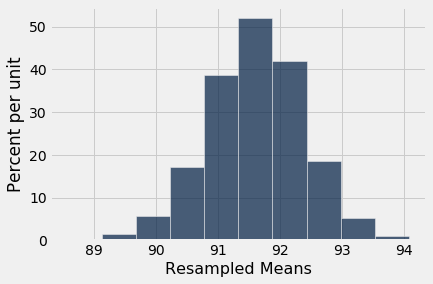

In [10]:
Table().with_column('Resampled Means', resampled_means).hist()

# 1.3 Question 3

Compute a 95 percent confidence interval for the average restaurant score using the array resampled_means.

In [11]:
lower_bound = np.round(percentile(2.5, resampled_means), 2)
upper_bound = np.round(percentile(97.5, resampled_means), 2)
print("95% confidence interval for the average restaurant score, computed by bootstrapping",
      ":\n(",lower_bound, ",", upper_bound, ")")

95% confidence interval for the average restaurant score, computed by bootstrapping :
( 90.05 , 93.07 )


# 1.4  Question 4

What distribution is the histogram between question 2 and 3 displaying (that is, what data are plotted), and why does it have that shape?

>The histogram is displaying the means of 5000 bootstrapped resamples drawn with replacement from our original restaurant samples of 100, which is also drawn with replacement. It is roughly normally distributed because of the Central Limit Theorem i.e. if we repeatedly calculate the arithmetic average of samples drawn randomly from a population with replacement, the probability distribution of those averages tends to follow a normal distribution even if the population's distribution is not normal.     

# 1.5  Question 5
Does the distribution of the sampled scores look normally distributed?  State “yes” or “no” and describe in one sentence why you should expect this result.

>No, the distribution of the sampled scores does not look normally distributed, instead it is left-tailed with most observations centered towards the right (close to the value of 100). This is because the distribution of samples does not necessarily equate to the distribution of mean of the samples, hence in this case, the Central Limit Theorem does not apply.  

# 1.6  Question 6
Without referencing the array resampled_means or performing any new simulations, calculate an interval around the sample_mean that covers approximately 95% of the numbers in the resampled_means array.  This confidence interval should look very similar to the one you computed in Question 3.

In [12]:
sample_sd = np.std(restaurant_sample.column('Score'))
sample_sd

7.635155532142093

In [13]:
sample_mean = np.mean(restaurant_sample.column('Score'))
sample_sd = np.std(restaurant_sample.column('Score'))
sample_size = restaurant_sample.num_rows

sd_of_means = sample_sd * 2
lower_bound_normal = sample_mean - sd_of_means
upper_bound_normal = sample_mean + sd_of_means
print("95% confidence interval for the average restaurant score, computed by a normal approximation",
      ":\n(",lower_bound_normal, ",", upper_bound_normal, ")")

95% confidence interval for the average restaurant score, computed by a normal approximation :
( 76.34968893571582 , 106.89031106428419 )


# 2  Testing the Central Limit Theorem
To recap the properties we just saw: The Central Limit Theorem tells us that the probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn.

# 2.1  Question 1
Define the function one_statistic_prop_heads which should return exactly one simulated statistic of the proportion of heads from n coin flips.

In [14]:
coin_proportions = make_array(.5, .5)

def one_statistic_prop_heads(n):
    simulated_proportions = sample_proportions(n, coin_proportions)
    prop_heads = simulated_proportions.item(0)* 100
    return prop_heads 

one_statistic_prop_heads(100)

48.0

# 2.2 Question 2 
The CLT only applies when sample sizes are "sufficiently large." This isn't a very precise statement. Is 10 large? How about 50? The truth is that it depends both on the original population distribution and just how "normal" you want the result to look. Let's use a simulation to get a feel for how the distribution of the sample mean changes as sample size goes up.

Consider a coin flip. If we say Heads is $1$ and Tails is $0$, then there's a 50% chance of getting a 1 and a 50% chance of getting a 0, which definitely doesn't match our definition of a normal distribution. The average of several coin tosses, where Heads is 1 and Tails is 0, is equal to the proportion of heads in those coin tosses (which is equivalent to the mean value of the coin tosses), so the CLT should hold true if we compute the sample proportion of heads many times.

Write a function called sample_size_n that takes in a sample size $n$. It should return an array that contains 5000 sample proportions of heads, each from $n$ coin flips.

In [15]:
def sample_size_n(n):
    coin_proportions = make_array(.5, .5)
    heads_proportions = make_array()
    for i in np.arange(5000):
        simulated_proportions = sample_proportions(n, coin_proportions)
        prop_heads = simulated_proportions.item(0)* 100
        heads_proportions = np.append(heads_proportions, prop_heads)
    return heads_proportions

sample_size_n(5000)

array([49.68, 50.12, 49.3 , ..., 49.48, 49.38, 50.12])

# 2.3  Question 3
Write a function called empirical_sample_mean_sd that takes a sample size n as its argument.  The function should simulate 500 samples with replacement of size n from the flight delays dataset, and it should return the standard deviation of the means of those 500 samples.

In [16]:
delays = Table().read_table("/Users/shristidhakal/Documents/Grad School/INFO5502/Restaurants Ratings/united_summer2015.csv")
print(delays)

Date   | Flight Number | Destination | Delay
6/1/15 | 73            | HNL         | 257
6/1/15 | 217           | EWR         | 28
6/1/15 | 237           | STL         | -3
6/1/15 | 250           | SAN         | 0
6/1/15 | 267           | PHL         | 64
6/1/15 | 273           | SEA         | -6
6/1/15 | 278           | SEA         | -8
6/1/15 | 292           | EWR         | 12
6/1/15 | 300           | HNL         | 20
6/1/15 | 317           | IND         | -10
... (13815 rows omitted)


In [17]:
def empirical_sample_mean_sd(n):
    sample_means = make_array()
    
    for i in np.arange(500):
        sample = delays.select('Delay').sample(n, with_replacement=False).column(0)
        sample_mean = np.mean(sample)
        sample_means = np.append(sample_means, sample_mean)
    return np.std(sample_means)

empirical_sample_mean_sd(10)

12.420387781385893

# 2.4 Question 4 
Now, write a function called predict_sample_mean_sd to find the predicted value of the standard deviation of means according to the relationship between the standard deviation of the sample mean and sample size that is discussed here in the textbook. It takes a sample size n (a number) as its argument. It returns the predicted value of the standard deviation of the mean delay time for samples of size n from the flight delays (represented in the table united).

In [18]:
def predict_sample_mean_sd(n):
    means = make_array()
    
    for i in np.arange(10000):
        means = np.append(means, np.mean(delays.sample(n).column('Delay')))
    sd = np.std(means)
    return sd

predict_sample_mean_sd(10)

12.734986611693001

In [19]:
predict_sample_mean_sd(500)

1.7647745004161297

>The predicted value of the standard deviation of the mean delay time for samples of size 10 was around 12.29 whereas the predicted valued of the same for sample size 500 was around 1.77. This reinforces the core idea of the standard deviation that as the sample size increases, the standard deviation tends to decrease.